Explore and create ML datasets

The idea of the tool is to suggest a likely fare to taxi riders so that they are not surprised, and so that they can protest if the charge is much higher than expected.

In [68]:
import google.datalab.bigquery as bq
import seaborn as sns
import pandas as pd
import numpy as np
import shutil

Task 1 : Write a SQL query to pick up the following fields

  pickup_datetime,
  pickup_longitude, pickup_latitude, 
  dropoff_longitude, dropoff_latitude,
  passenger_count,
  trip_distance,
  tolls_amount,
  fare_amount,
  total_amount

from the dataset and explore a small part of the data. Make sure to pick a repeatable subset of the data so that if someone reruns this notebook, they will get the same results.

In [69]:
task_1_raw="""
SELECT
  pickup_datetime,
  pickup_longitude,
  pickup_latitude,
  dropoff_longitude,
  dropoff_latitude,
  passenger_count,
  trip_distance,
  tolls_amount,
  fare_amount,
  total_amount
FROM
  `nyc-tlc.yellow.trips`
WHERE
  MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), NUM_PERCENT) = 1
"""

In [70]:
query=task_1_raw.replace('NUM_PERCENT', '100000')
#print query
trips=bq.Query(query).execute().result().to_dataframe()
print "Total trips = {} ".format(len(trips))
trips[:10]

Total trips = 10789 


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
0,2009-09-04 21:49:30,-73.991085,40.755503,-73.991185,40.755543,1,0.00,0.0,2.5,2.5
1,2009-08-20 23:04:58,-73.980657,40.765322,-73.962737,40.769690,1,2.50,0.0,2.5,2.5
2,2009-07-04 08:36:00,-73.992533,40.756207,-73.992555,40.756205,1,0.00,0.0,2.5,2.5
3,2009-09-28 17:47:22,-73.984128,40.780583,-73.984141,40.780562,1,0.00,0.0,2.5,2.5
4,2009-08-31 13:27:07,-73.979360,40.735598,-73.971661,40.758827,1,1.80,0.0,2.5,2.5
5,2009-05-27 20:37:00,-73.967982,40.762537,-73.967553,40.761778,5,0.07,0.0,2.5,3.0
6,2011-06-19 12:39:56,-73.994080,40.751073,-73.994097,40.751091,1,0.00,0.0,2.5,3.0
7,2009-09-30 22:58:14,-73.988954,40.758612,-73.952118,40.776227,2,4.70,0.0,2.5,3.0
8,2013-12-06 14:55:00,-73.988727,40.773987,-73.988755,40.774037,5,0.00,0.0,2.5,3.0
9,2013-12-21 06:21:00,-73.986160,40.715775,-73.985950,40.715715,5,0.04,0.0,2.5,3.0


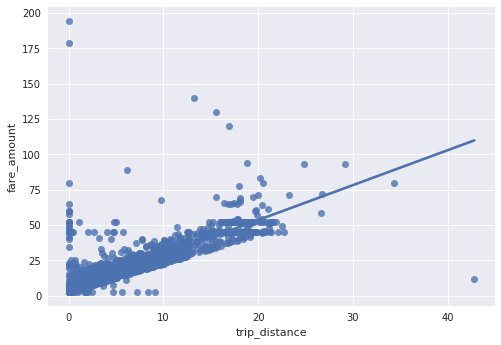

In [71]:
ax=sns.regplot( x="trip_distance", y="fare_amount", ci=None, truncate=True, data=trips )

In [72]:
tollrides=trips[trips['tolls_amount'] > 0]
tollrides[tollrides['pickup_datetime'] == '2014-05-20 23:09:00']

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
2842,2014-05-20 23:09:00,-73.975610,40.751660,-73.953920,40.743240,1,2.22,5.33,8.5,14.83
4055,2014-05-20 23:09:00,-73.987960,40.754062,-73.956627,40.745962,2,3.11,5.33,11.5,21.30
5045,2014-05-20 23:09:00,0.000000,0.000000,0.000000,0.000000,1,6.38,5.33,20.0,26.33
5145,2014-05-20 23:09:00,-73.873527,40.773922,-73.944947,40.828902,5,8.35,5.33,25.0,36.33
5249,2014-05-20 23:09:00,-74.005625,40.736770,-73.919840,40.877687,1,14.33,2.44,42.0,54.43
5306,2014-05-20 23:09:00,-73.783898,40.648660,-73.981845,40.762872,6,18.18,5.33,52.0,69.30
5402,2014-05-20 23:09:00,-73.781987,40.644755,-73.921672,40.828412,1,19.08,5.33,50.5,56.83
5854,2014-05-20 23:09:00,-73.873210,40.774042,-73.978013,40.755800,5,10.45,5.33,30.5,36.83
5855,2014-05-20 23:09:00,-73.870160,40.760742,-73.980912,40.788492,4,10.37,5.33,30.5,45.91
5861,2014-05-20 23:09:00,-73.874445,40.774037,-73.982382,40.784930,1,9.97,5.33,30.5,44.10


In [73]:
trips.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,tolls_amount,fare_amount,total_amount
count,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000
mean,-72.577466,39.988518,-72.577056,39.991694,1.648716,2.837068,0.228359,11.165192,13.280564
std,10.071200,5.523964,10.068592,5.510504,1.282589,3.319036,1.144977,9.444876,11.267704
min,-75.336579,0.000000,-75.381754,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000
25%,-73.992172,40.735837,-73.991581,40.734267,1.000000,1.010000,0.000000,6.000000,7.200000
50%,-73.981871,40.753200,-73.980401,40.752872,1.000000,1.750000,0.000000,8.500000,10.000000
75%,-73.967330,40.767309,-73.964102,40.767484,2.000000,3.110000,0.000000,12.500000,14.600000
max,0.000000,41.366138,0.000000,41.366138,6.000000,42.800000,16.000000,194.750000,204.750000


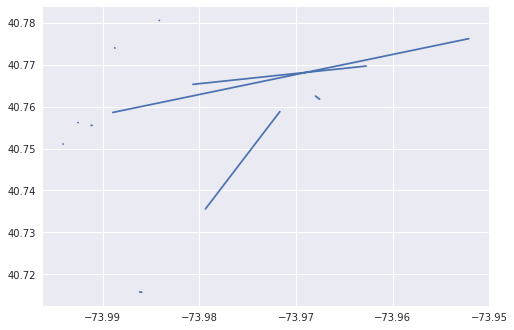

In [74]:
def showtrips(df, numlines):
  import matplotlib.pyplot as plt
  lats=[]
  lons=[]
  goodrows=df[df['pickup_longitude'] < - 70]
  for iter, row in goodrows[:numlines].iterrows():
    lons.append(row['pickup_longitude'])
    lons.append(row['dropoff_longitude'])
    lons.append(None)
    lats.append(row['pickup_latitude'])
    lats.append(row['dropoff_latitude'])
    lats.append(None)
  sns.set_style("darkgrid")
  plt.plot(lons,lats)

showtrips(trips, 10)

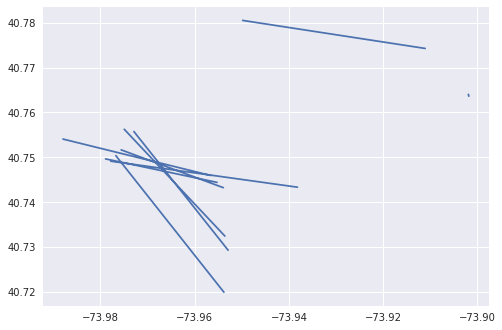

In [75]:
showtrips(tollrides, 10)

In [76]:
def sample_between(a,b):
  basequery="""
  SELECT
    (tolls_amount + fare_amount) as fare_amount,
    pickup_latitude AS pickuplat,
    pickup_longitude AS pickuplon,
    dropoff_latitude AS dropofflat,
    dropoff_longitude AS dropofflon,
    passenger_count*1.0 AS passenger_count
  FROM
    `nyc-tlc.yellow.trips`
  WHERE
    trip_distance > 0
    AND pickup_longitude > -78
    AND pickup_longitude < -70
    AND dropoff_longitude > -78
    AND dropoff_longitude < -70
    AND pickup_latitude > 37
    AND pickup_latitude < 45
    AND dropoff_latitude > 37
    AND dropoff_latitude < 45
    AND passenger_count > 0
  """
  sampler = "AND MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), EVERY_N) = 1"
  sampler2 = "AND {0} >= {1}\n AND {0} < {2}".format(
         "MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), EVERY_N * 100)",
         "(EVERY_N * {})".format(a), "(EVERY_N * {})".format(b)
      )
  return "{}\n{}\n{}".format(basequery, sampler, sampler2)

def create_query(phase, EVERY_N):
  """Phase: train (70%) valid (15%) or test (15%)"""
  query = ""
  if phase == 'train':
    # Training
    query = sample_between(0, 70)
  elif phase == 'valid':
    # Validation
    query = sample_between(70, 85)
  else:
    # Test
    query = sample_between(85, 100)
  return query.replace("EVERY_N", str(EVERY_N))

print create_query('train', 100000)
    


  SELECT
    (tolls_amount + fare_amount) as fare_amount,
    pickup_latitude AS pickuplat,
    pickup_longitude AS pickuplon,
    dropoff_latitude AS dropofflat,
    dropoff_longitude AS dropofflon,
    passenger_count*1.0 AS passenger_count
  FROM
    `nyc-tlc.yellow.trips`
  WHERE
    trip_distance > 0
    AND pickup_longitude > -78
    AND pickup_longitude < -70
    AND dropoff_longitude > -78
    AND dropoff_longitude < -70
    AND pickup_latitude > 37
    AND pickup_latitude < 45
    AND dropoff_latitude > 37
    AND dropoff_latitude < 45
    AND passenger_count > 0
  
AND MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), 100000) = 1
AND MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), 100000 * 100) >= (100000 * 0)
 AND MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), 100000 * 100) < (100000 * 70)


In [77]:
def to_csv(df, filename):
  outdf = df.copy(deep = False)
  outdf.loc[:, 'key'] = np.arange(0, len(outdf)) # rownumber as key
  # Reorder columns so that target is first column
  cols = outdf.columns.tolist()
  cols.remove('fare_amount')
  cols.insert(0, 'fare_amount')
  print cols  # new order of columns
  outdf = outdf[cols]
  outdf.to_csv(filename, header = False, index_label = False, index = False)
  print "Wrote {} to {}".format(len(outdf), filename)

for phase in ['train', 'valid', 'test']:
  query = create_query(phase, 100000)
  df = bq.Query(query).execute().result().to_dataframe()
  to_csv(df, 'taxi-{}.csv'.format(phase))

['fare_amount', u'pickuplat', u'pickuplon', u'dropofflat', u'dropofflon', u'passenger_count', 'key']
Wrote 7645 to taxi-train.csv
['fare_amount', u'pickuplat', u'pickuplon', u'dropofflat', u'dropofflon', u'passenger_count', 'key']
Wrote 1814 to taxi-valid.csv
['fare_amount', u'pickuplat', u'pickuplon', u'dropofflat', u'dropofflon', u'passenger_count', 'key']
Wrote 1017 to taxi-test.csv


In [78]:
!ls -l *.csv

-rw-r--r-- 1 root root  58048 Jul 22 12:33 taxi-test.csv
-rw-r--r-- 1 root root 434648 Jul 22 12:33 taxi-train.csv
-rw-r--r-- 1 root root 102591 Jul 22 12:33 taxi-valid.csv


In [79]:
%bash
head taxi-train.csv

2.5,40.758612,-73.988954,40.776227,-73.952118,2.0,0
2.5,40.763727,-73.971783,40.763768,-73.971769,2.0,1
3.0,40.746602,-73.990085,40.74765,-73.993129,2.0,2
3.0,40.786085,-73.976258,40.788517,-73.974417,2.0,3
3.5,40.744768,-73.98582,40.752505,-73.978803,2.0,4
3.5,40.768267,-73.992835,40.788212,-73.93862,2.0,5
3.5,40.769257,-73.961372,40.768292,-73.966002,2.0,6
3.5,40.781372,-73.981335,40.78386,-73.981517,2.0,7
3.5,40.727202,-73.982673,40.729524,-73.978255,2.0,8
3.5,40.767969,-73.984404,40.764324,-73.988457,2.0,9


In [80]:
import datalab.bigquery as bq
import pandas as pd
import numpy as np
import shutil

def distance_between(lat1, lon1, lat2, lon2):
  # Haversine formula to compute distance "as the crow flies".  Taxis can't fly of course.
  dist = np.degrees(np.arccos(np.sin(np.radians(lat1)) * np.sin(np.radians(lat2)) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.cos(np.radians(lon2 - lon1)))) * 60 * 1.515 * 1.609344
  return dist

def estimate_distance(df):
  return distance_between(df['pickuplat'], df['pickuplon'], df['dropofflat'], df['dropofflon'])

def compute_rmse(actual, predicted):
  return np.sqrt(np.mean((actual - predicted)**2))

def print_rmse(df, rate, name):
  print "{1} RMSE = {0}".format(compute_rmse(df['fare_amount'], rate * estimate_distance(df)), name)

FEATURES = ['pickuplon','pickuplat','dropofflon','dropofflat','passengers']
TARGET = 'fare_amount'
columns = list([TARGET])
columns.extend(FEATURES) # in CSV, target is the first column, after the features
columns.append('key')
df_train = pd.read_csv('taxi-train.csv', header = None, names = columns)
df_valid = pd.read_csv('taxi-valid.csv', header = None, names = columns)
df_test = pd.read_csv('taxi-test.csv', header = None, names = columns)
rate = df_train['fare_amount'].mean() / estimate_distance(df_train).mean()
print "Rate = ${0}/km".format(rate)
print_rmse(df_train, rate, 'Train')
print_rmse(df_valid, rate, 'Valid') 
print_rmse(df_test, rate, 'Test') 

Rate = $3.24247602838/km
Train RMSE = 10.5634986508
Valid RMSE = 12.4966712886
Test RMSE = 9.0051160877


/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in arccos
